# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
df = pd.read_csv('marketing_campaign_data.csv')

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df

ID  Year_Birth Education Marital_Status      Income  Kidhome  \
0      5524        1957        S1         Lajang  58138000.0        0   
1      2174        1954        S1         Lajang  46344000.0        1   
2      4141        1965        S1    Bertunangan  71613000.0        0   
3      6182        1984        S1    Bertunangan  26646000.0        1   
4      5324        1981        S3        Menikah  58293000.0        1   
...     ...         ...       ...            ...         ...      ...   
2235  10870        1967        S1        Menikah  61223000.0        0   
2236   4001        1946        S3    Bertunangan  64014000.0        2   
2237   7270        1981        S1          Cerai  56981000.0        0   
2238   8235        1956        S2    Bertunangan  69245000.0        0   
2239   9405        1954        S3        Menikah  52869000.0        1   

      Teenhome Dt_Customer  Recency  MntCoke  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58   635000  ...                  7   
1            1  08-03-2014       38    11000  ...                  5   
2            0  21-08-2013       26   426000  ...                  4   
3            0  10-02-2014       26    11000  ...                  6   
4            0  19-01-2014       94   173000  ...                  5   
...        ...         ...      ...      ...  ...                ...   
2235         1  13-06-2013       46   709000  ...                  5   
2236         1  10-06-2014       56   406000  ...                  7   
2237         0  25-01-2014       91   908000  ...                  6   
2238         1  24-01-2014        8   428000  ...                  3   
2239         1  15-10-2012       40    84000  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.duplicated(subset='ID').sum()

0

semua data customer adalah unik

# Conversion Rate Analysis Based on Income, Spending and Age

## Features Engineering

### Conversion Rate

In [7]:
df['CVR'] = df['Response']/df['NumWebVisitsMonth']

### Jumlah Anak

In [8]:
df['jumlah_anak'] = df['Kidhome']+df['Teenhome']

### Umur

In [9]:
df['umur'] = 2022 - df['Year_Birth']

### Total Transaksi

In [10]:
df['total_transaksi'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

### Total Pengeluaran

In [11]:
df['total_pengeluaran'] = df['MntCoke']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

### Customer Loyalty

In [29]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

C:\Users\Muhammad Hanif\AppData\Local\Temp\ipykernel_14780\177162232.py:1: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\Muhammad Hanif\AppData\Local\Temp\ipykernel_14780\177162232.py:1: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\Muhammad Hanif\AppData\Local\Temp\ipykernel_14780\177162232.py:1: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\Muhammad Hanif\AppData\Local\Temp\ipykernel_14780\177162232.py:1: UserWarning: Parsing '13-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.


In [36]:
import datetime as dt

In [32]:
from datetime import datetime

In [30]:
df['Dt_Customer']

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [38]:
max(df['Dt_Customer'].dt.year)

2014

In [45]:
df['month_cust'] = (pd.to_datetime('2015-01-01')-df['Dt_Customer'])/np.timedelta64(1, 'D')

# Exploratory Data Analysis

In [46]:
numeric = df.describe().columns.tolist()

In [47]:
numeric.remove('ID')

In [48]:
numeric.remove('Year_Birth')

In [49]:
columns = df.columns.tolist()

In [50]:
for i in numeric:
    columns.remove(i)

In [51]:
categorical = columns

In [52]:
categorical.remove('Year_Birth')

In [53]:
categorical.remove('ID')

In [54]:
categorical.remove('Dt_Customer')

## Descriptive Analysis

In [55]:
round(df.describe())

ID  Year_Birth       Income  Kidhome  Teenhome  Recency  \
count   2240.0      2240.0       2216.0   2240.0    2240.0   2240.0   
mean    5592.0      1969.0   52247251.0      0.0       1.0     49.0   
std     3247.0        12.0   25173077.0      1.0       1.0     29.0   
min        0.0      1893.0    1730000.0      0.0       0.0      0.0   
25%     2828.0      1959.0   35303000.0      0.0       0.0     24.0   
50%     5458.0      1970.0   51381500.0      0.0       0.0     49.0   
75%     8428.0      1977.0   68522000.0      1.0       1.0     74.0   
max    11191.0      1996.0  666666000.0      2.0       2.0     99.0   

         MntCoke  MntFruits  MntMeatProducts  MntFishProducts  ...  Complain  \
count     2240.0     2240.0           2240.0           2240.0  ...    2240.0   
mean    303936.0    26302.0         166950.0          37525.0  ...       0.0   
std     336597.0    39773.0         225715.0          54629.0  ...       0.0   
min          0.0        0.0              0.0              0.0  ...       0.0   
25%      23750.0     1000.0          16000.0           3000.0  ...       0.0   
50%     173500.0     8000.0          67000.0          12000.0  ...       0.0   
75%     504250.0    33000.0         232000.0          50000.0  ...       0.0   
max    1493000.0   199000.0        1725000.0         259000.0  ...       1.0   

       Z_CostContact  Z_Revenue  Response     CVR  jumlah_anak    umur  \
count         2240.0     2240.0    2240.0  2229.0       2240.0  2240.0   
mean             3.0       11.0       0.0     0.0          1.0    53.0   
std              0.0        0.0       0.0     0.0          1.0    12.0   
min              3.0       11.0       0.0     0.0          0.0    26.0   
25%              3.0       11.0       0.0     0.0          0.0    45.0   
50%              3.0       11.0       0.0     0.0          1.0    52.0   
75%              3.0       11.0       0.0     0.0          1.0    63.0   
max              3.0       11.0       1.0     1.0          3.0   129.0   

       total_transaksi  total_pengeluaran  month_cust  
count           2240.0             2240.0      2240.0  
mean              15.0           605798.0       538.0  
std                8.0           602249.0       232.0  
min                0.0             5000.0        26.0  
25%                8.0            68750.0       367.0  
50%               15.0           396000.0       539.0  
75%               21.0          1045500.0       711.0  
max               44.0          2525000.0      1089.0  

[8 rows x 32 columns]

## Univariate Analysis

C:\Users\Muhammad Hanif\AppData\Local\Temp\ipykernel_14780\769156113.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,5))


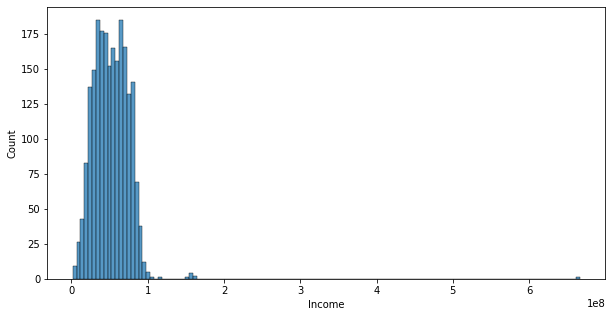

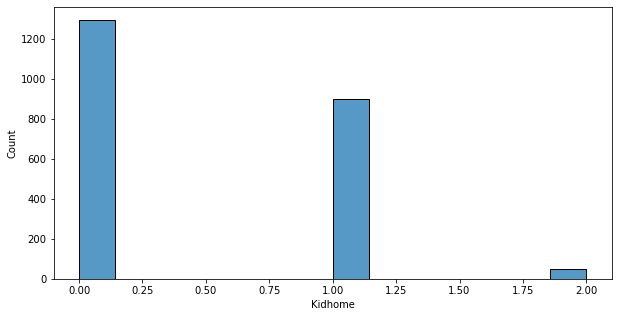

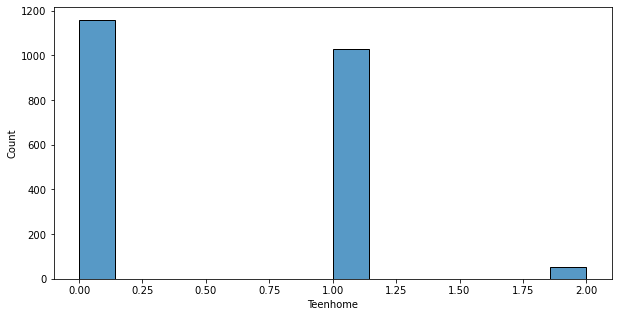

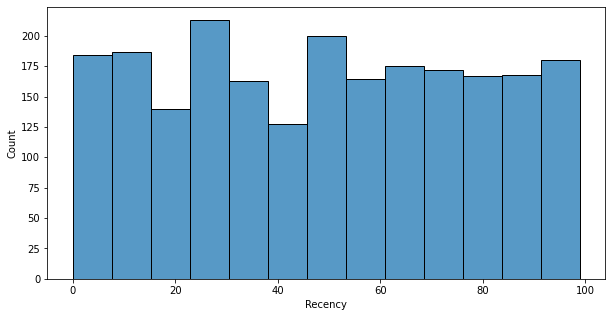

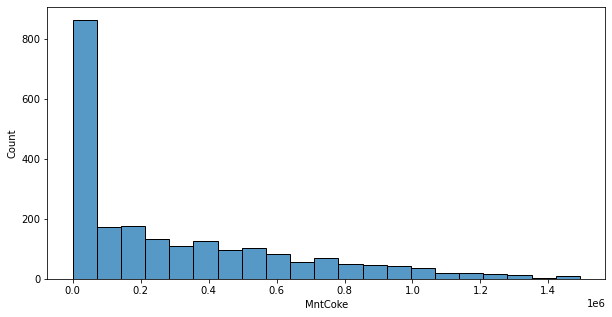

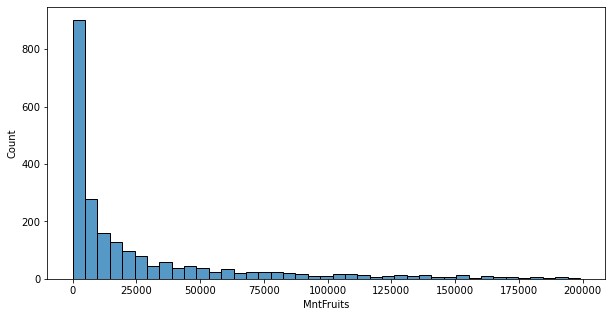

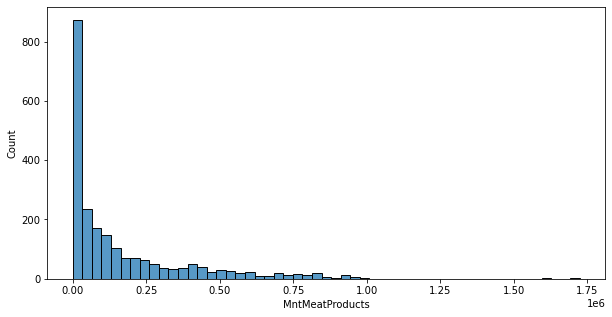

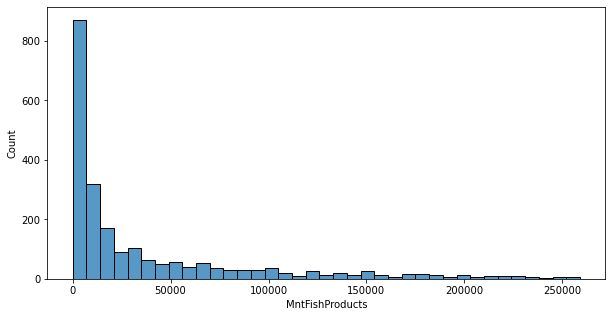

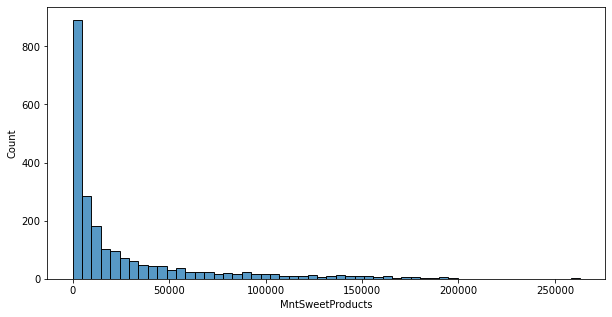

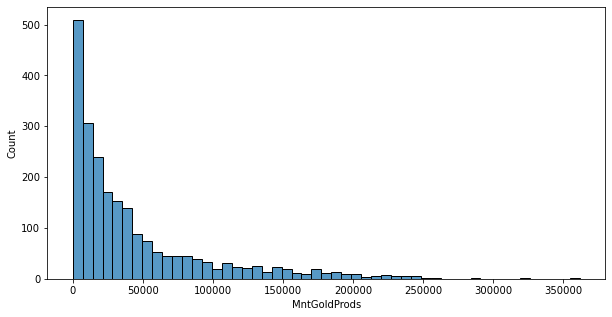

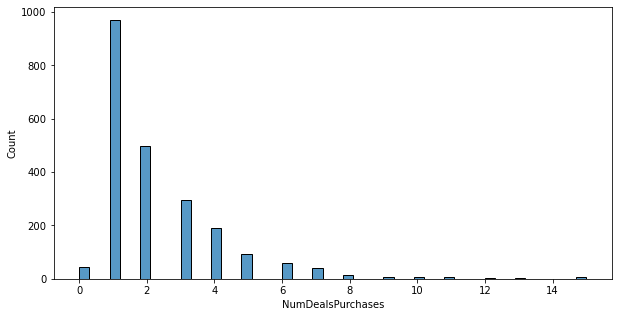

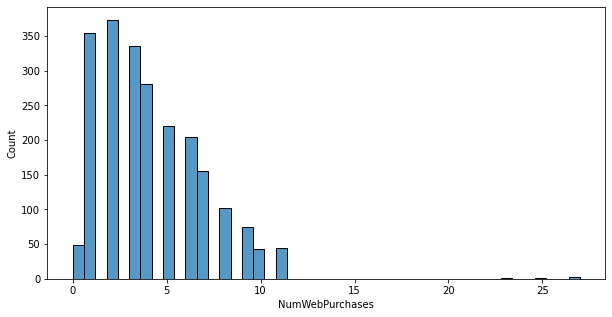

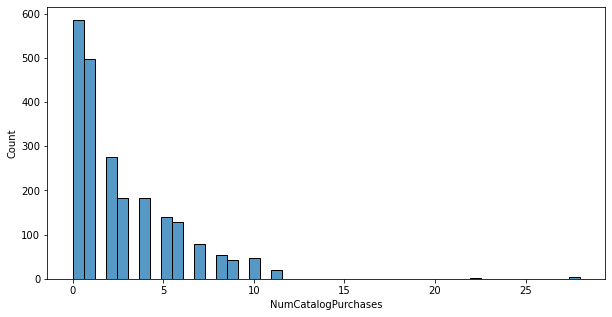

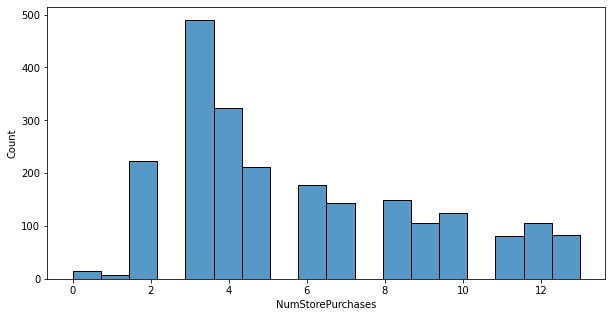

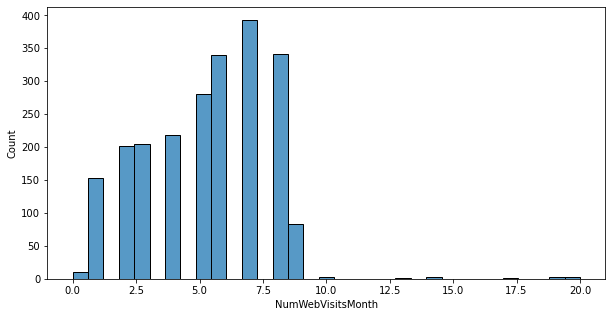

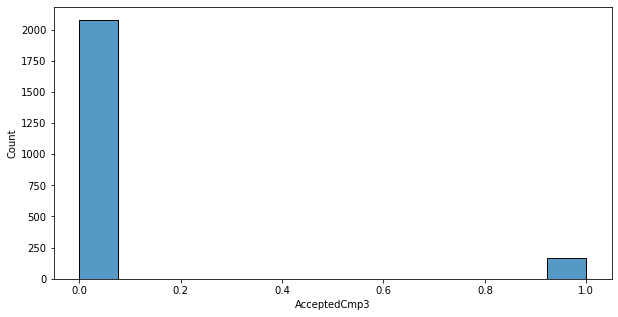

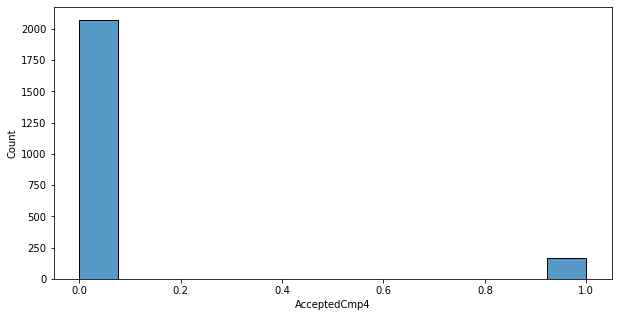

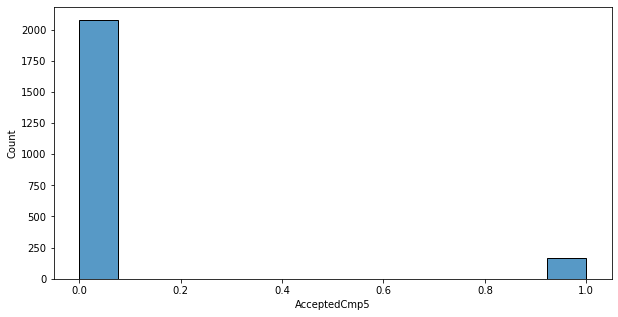

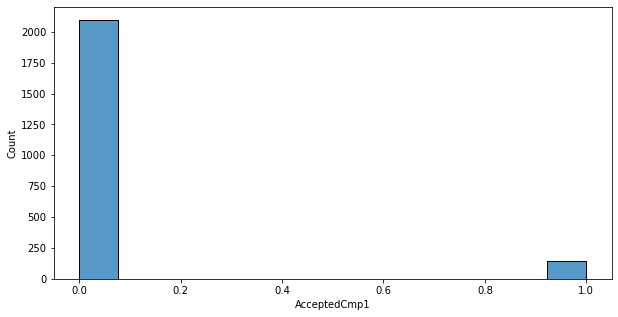

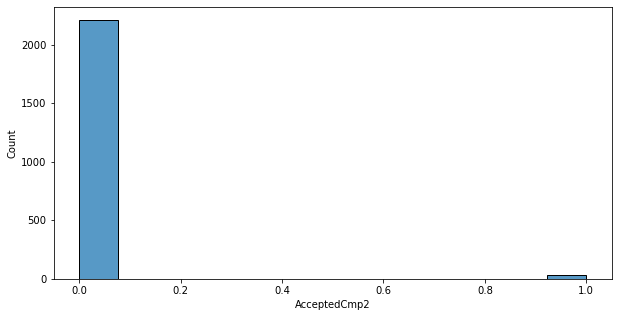

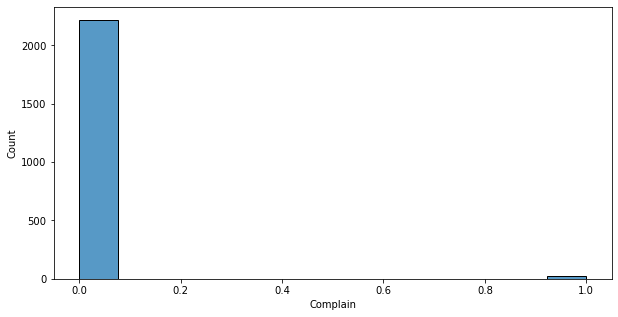

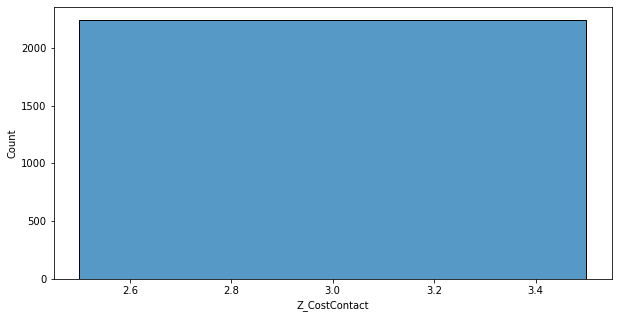

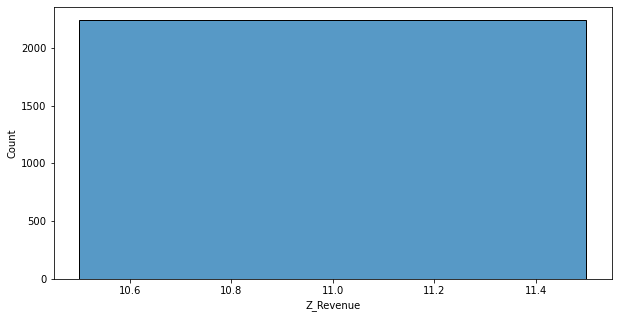

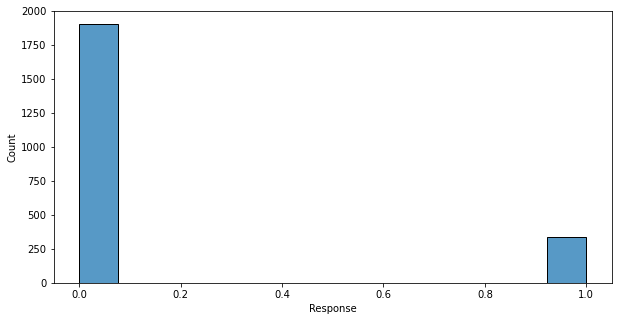

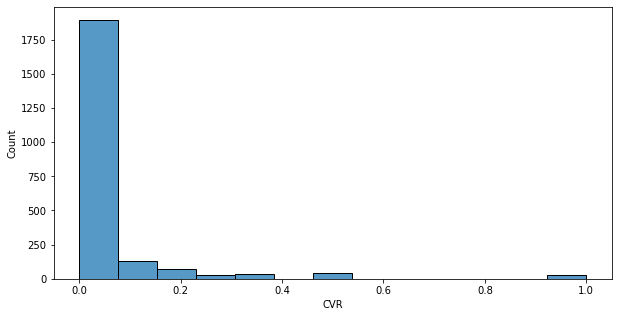

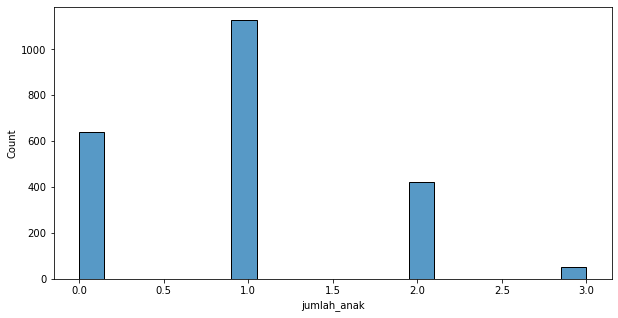

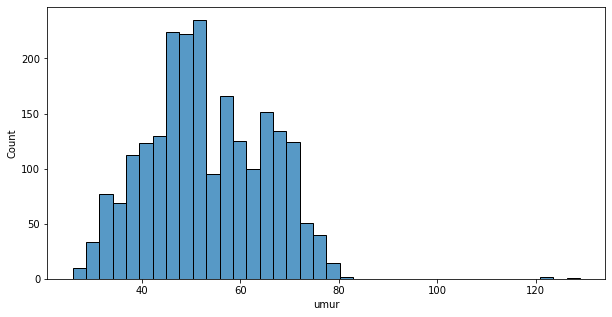

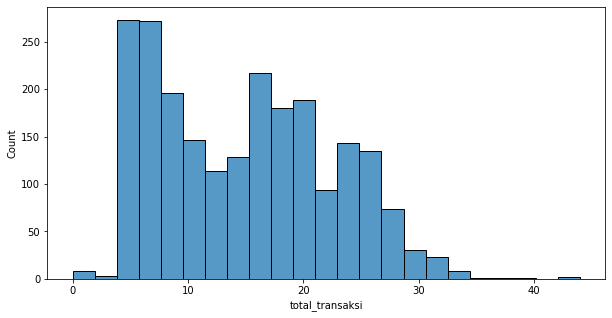

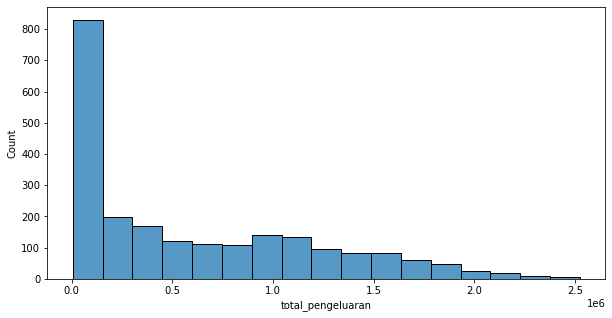

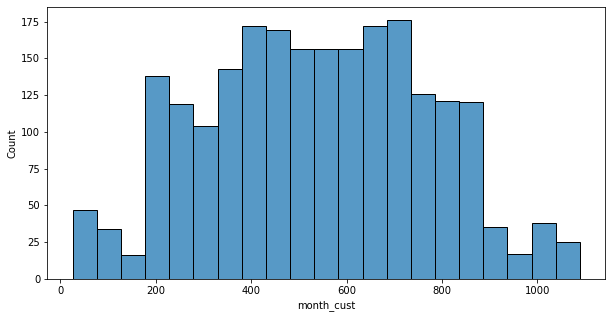

In [56]:
for j in range (0,len(numeric)):
    num = numeric[j]
    plt.figure(figsize=(10,5))
    sns.histplot(data=df,x=num)

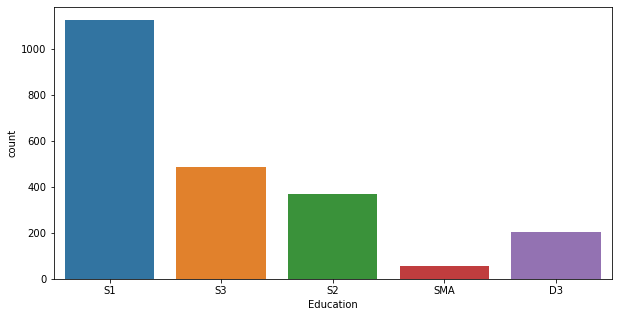

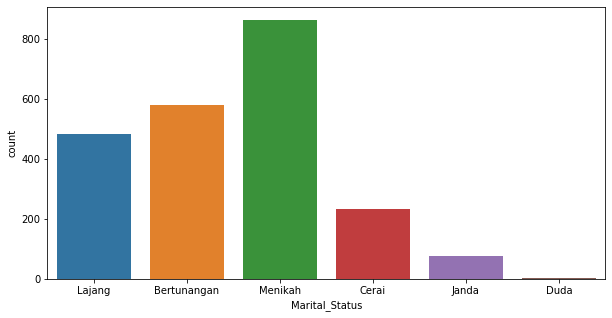

In [57]:
for j in range (0,len(categorical)):
    cat = categorical[j]
    plt.figure(figsize=(10,5))
    sns.countplot(data=df,x=cat)

## Bivariate Analysis

### Total Transaksi

In [64]:
df[df['total_transaksi']> np.percentile(df['total_transaksi'],50)]['total_transaksi_bins'] = 1

C:\Users\Muhammad Hanif\AppData\Local\Temp\ipykernel_14780\1552214098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['total_transaksi']> np.percentile(df['total_transaksi'],50)]['total_transaksi_bins'] = 1


In [66]:
list_segment = [] #membuat list kosong
for i, kolom in df.iterrows(): #melakukan iterasi pada setiap baris dataframe
    if kolom['total_transaksi'] >= np.percentile(df['total_transaksi'],50):
        segment = 1
    else:
        segment = 0
    list_segment.append(segment) #menambahkan list kosong dari item tiap row
    
df['total_transaksi_bins'] = list_segment

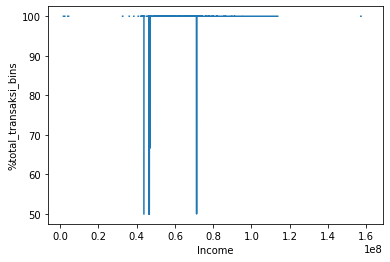

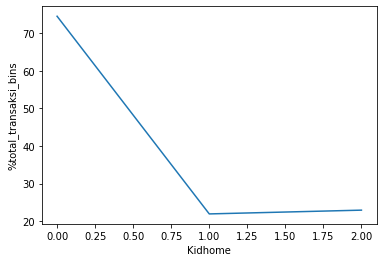

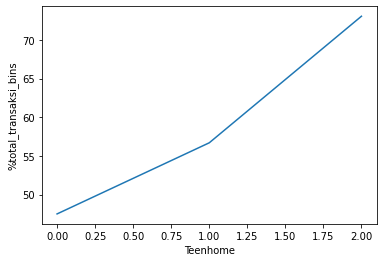

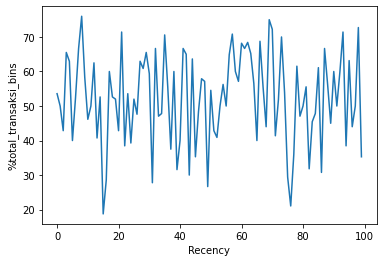

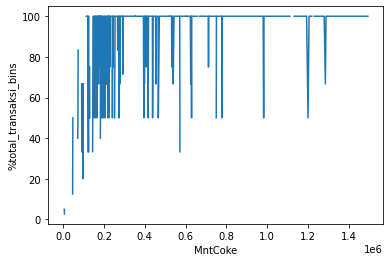

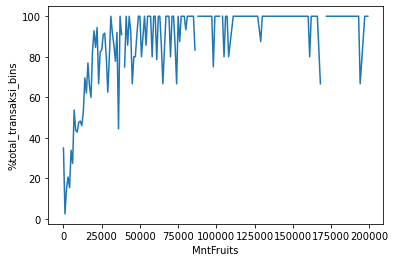

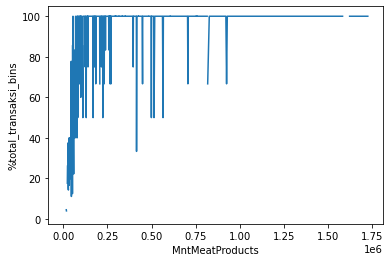

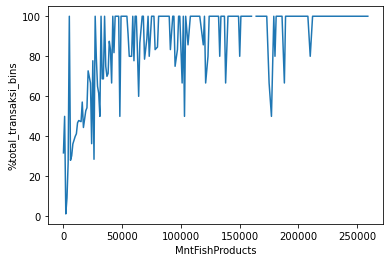

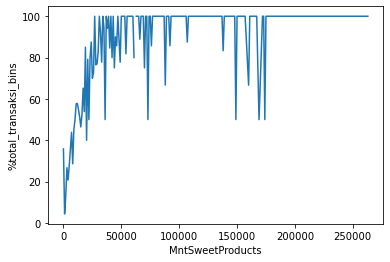

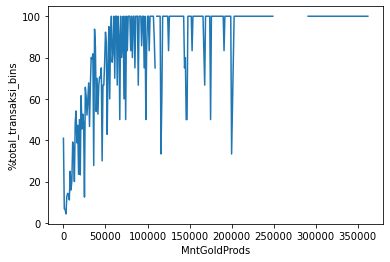

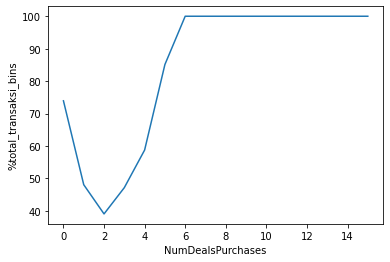

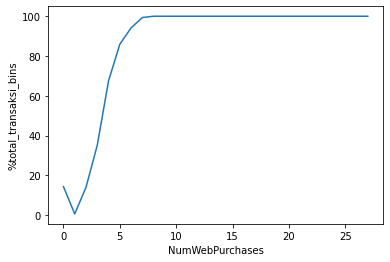

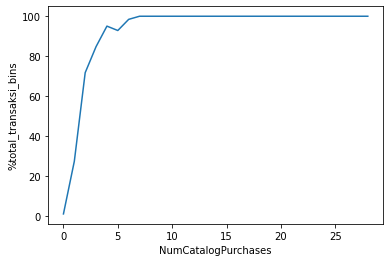

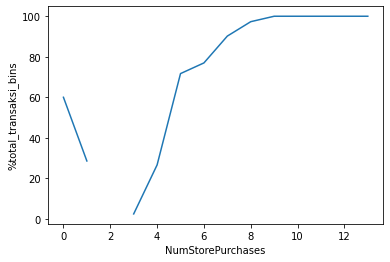

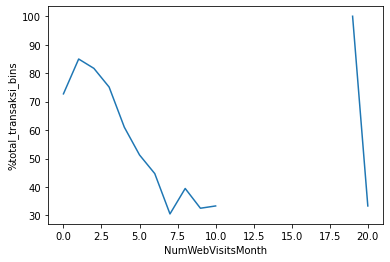

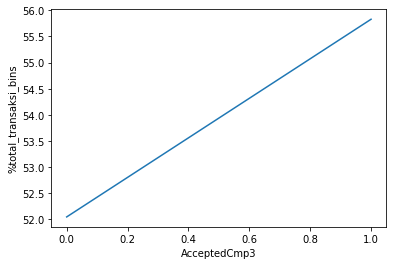

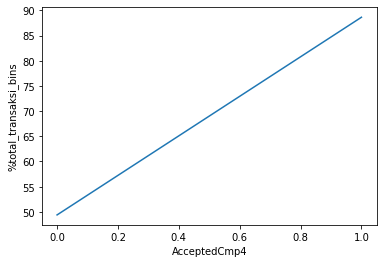

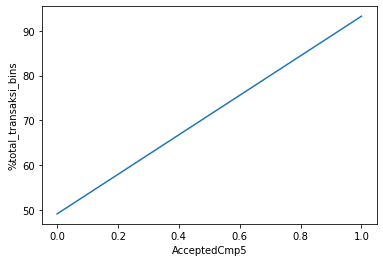

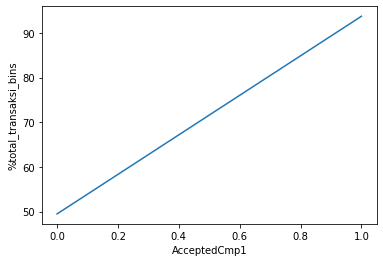

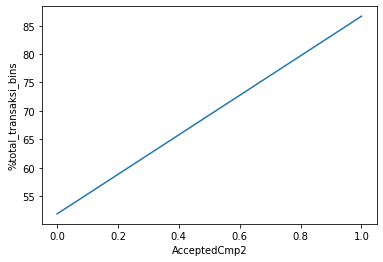

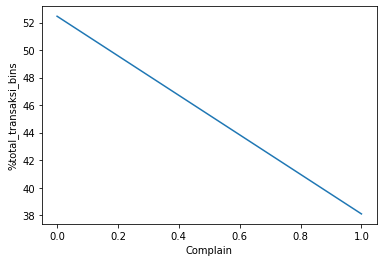

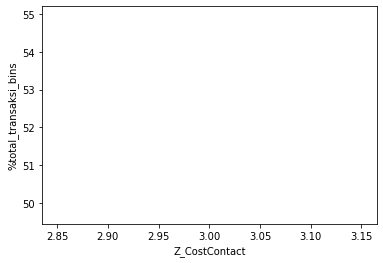

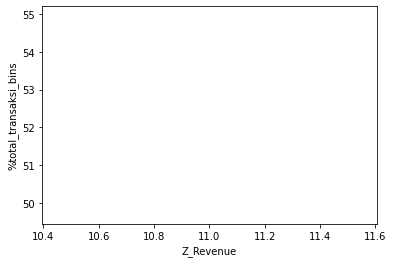

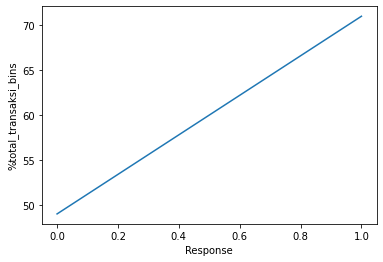

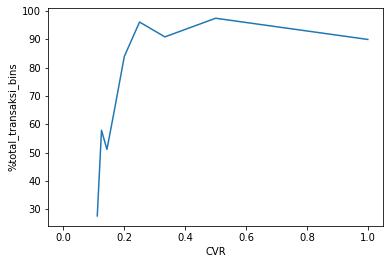

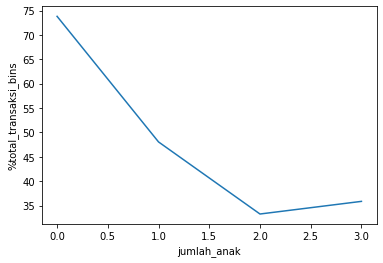

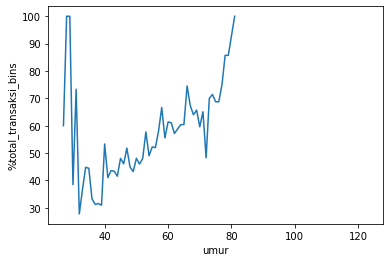

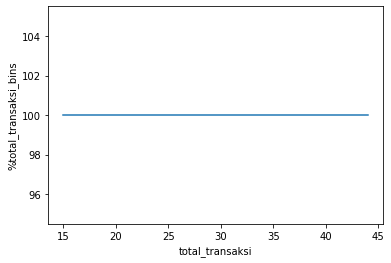

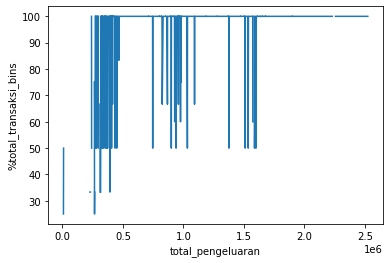

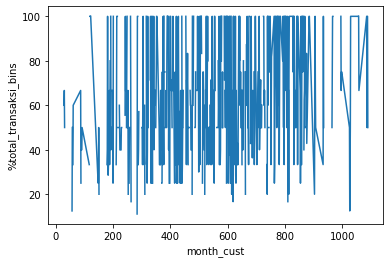

In [68]:
for j in range (0,len(numeric)):
    num = numeric[j]
    df['total_transaksi_bins_new'] = df['total_transaksi_bins']
    df_num = df.groupby([num])['total_transaksi_bins'].count()
    df_num = df_num.reset_index()
    df_num_corr = df[df['total_transaksi_bins']==1].groupby([num])['total_transaksi_bins_new'].count()
    df_num_corr = df_num_corr.reset_index()
    df_num_corr = df_num.merge(df_num_corr,how='left',on=num)
    df_num_corr['%total_transaksi_bins'] = (df_num_corr['total_transaksi_bins_new']/df_num_corr['total_transaksi_bins'])*100
    plt.plot(df_num_corr[num],df_num_corr['%total_transaksi_bins'])
    plt.xlabel(num)
    plt.ylabel('%total_transaksi_bins')
    plt.show()

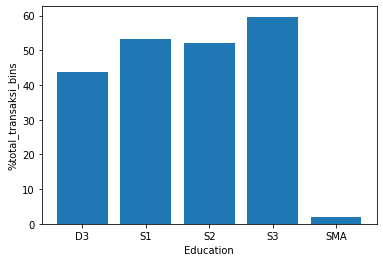

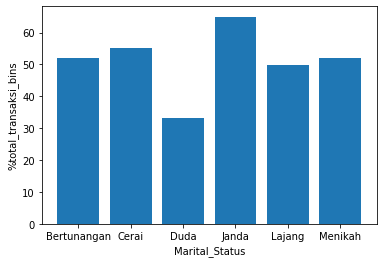

In [69]:
for j in range (0,len(categorical)):
    cat = categorical[j]
    df['total_transaksi_bins_new'] = df['total_transaksi_bins']
    df_cat = df.groupby([cat])['total_transaksi_bins'].count()
    df_cat = df_cat.reset_index()
    df_cat_corr = df[df['total_transaksi_bins']==1].groupby([cat])['total_transaksi_bins_new'].count()
    df_cat_corr = df_cat_corr.reset_index()
    df_cat_corr = df_cat.merge(df_cat_corr,how='left',on=cat)
    df_cat_corr['%total_transaksi_bins'] = (df_cat_corr['total_transaksi_bins_new']/df_cat_corr['total_transaksi_bins'])*100
    plt.bar(df_cat_corr[cat],df_cat_corr['%total_transaksi_bins'])
    plt.xlabel(cat)
    plt.ylabel('%total_transaksi_bins')
    plt.show()


### Total Pengeluaran

In [70]:
list_segment = [] #membuat list kosong
for i, kolom in df.iterrows(): #melakukan iterasi pada setiap baris dataframe
    if kolom['total_pengeluaran'] >= np.percentile(df['total_pengeluaran'],50):
        segment = 1
    else:
        segment = 0
    list_segment.append(segment) #menambahkan list kosong dari item tiap row
    
df['total_pengeluaran_bins'] = list_segment

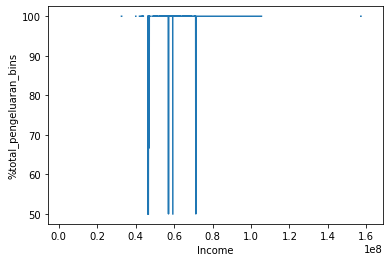

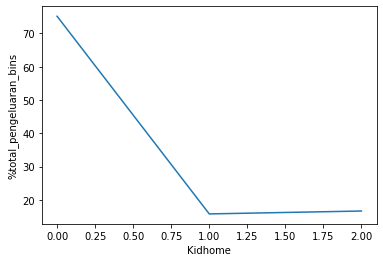

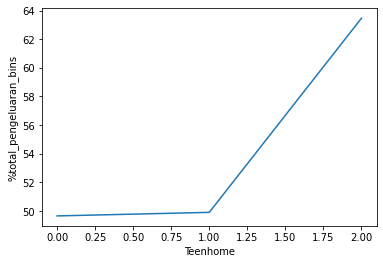

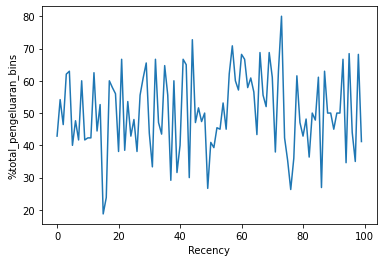

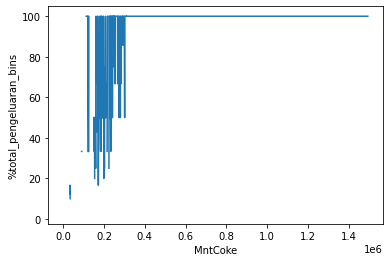

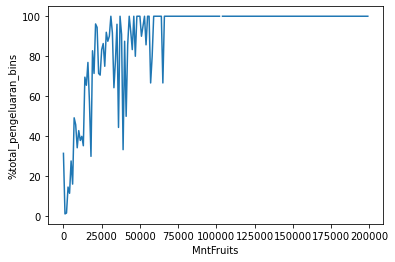

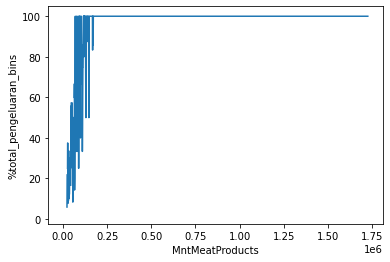

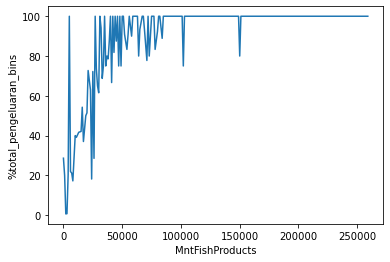

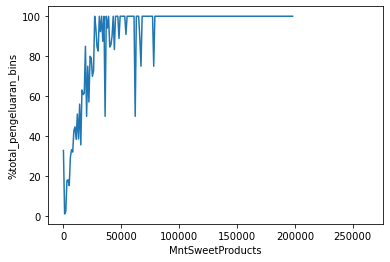

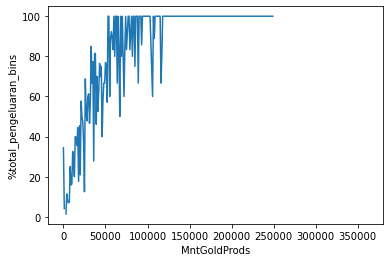

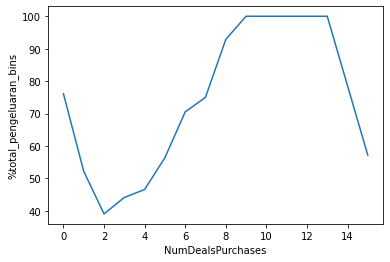

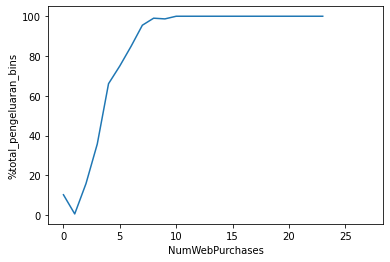

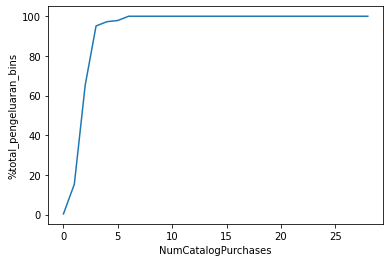

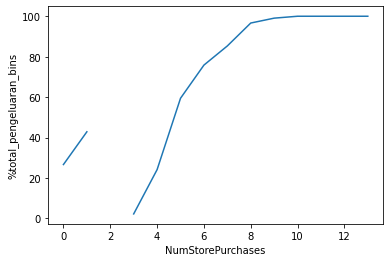

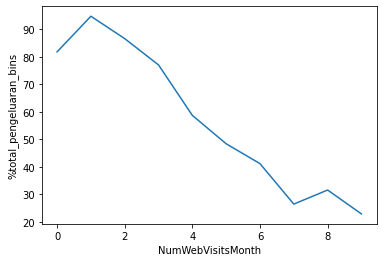

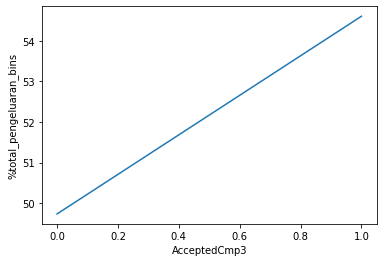

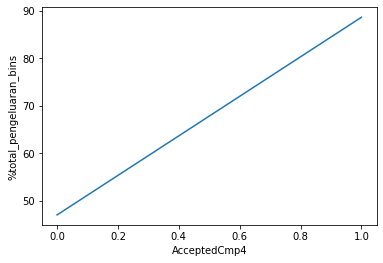

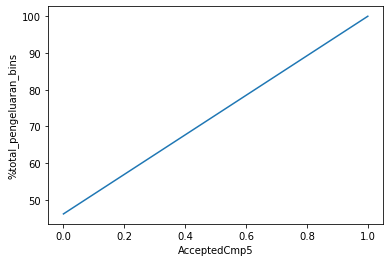

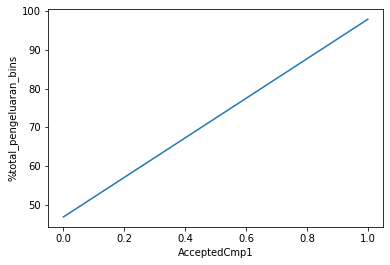

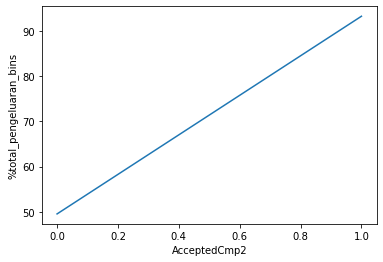

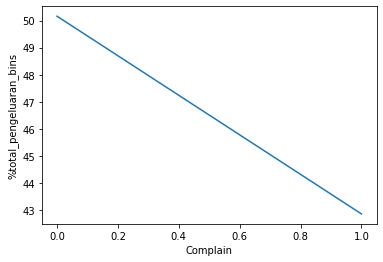

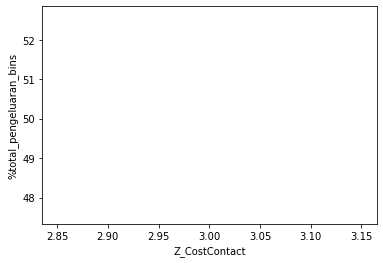

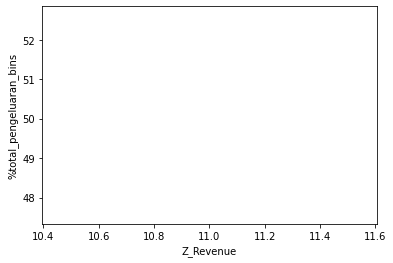

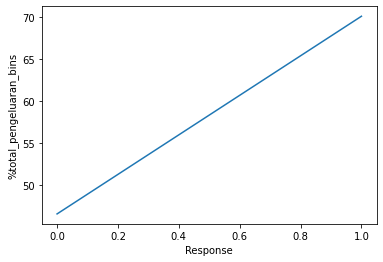

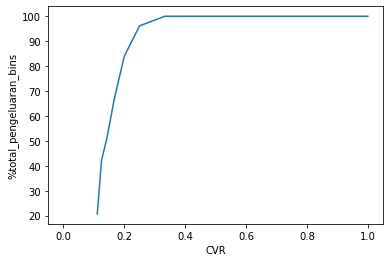

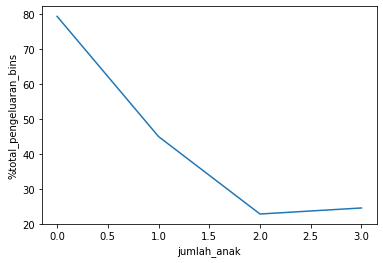

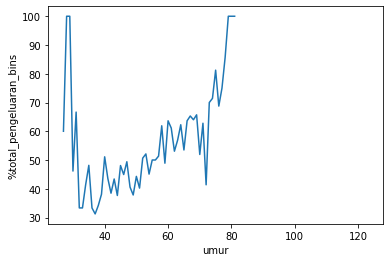

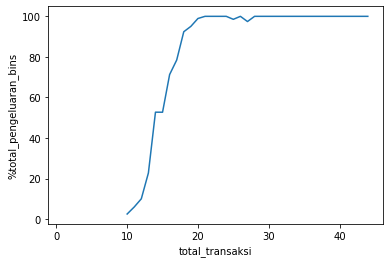

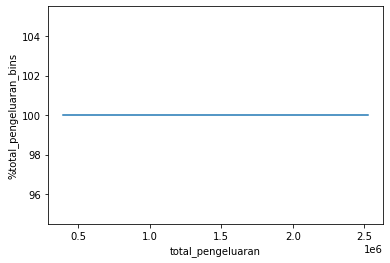

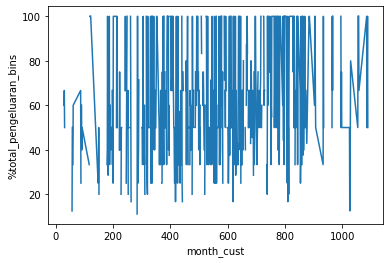

In [71]:
for j in range (0,len(numeric)):
    num = numeric[j]
    df['total_pengeluaran_bins_new'] = df['total_pengeluaran_bins']
    df_num = df.groupby([num])['total_pengeluaran_bins'].count()
    df_num = df_num.reset_index()
    df_num_corr = df[df['total_pengeluaran_bins']==1].groupby([num])['total_pengeluaran_bins_new'].count()
    df_num_corr = df_num_corr.reset_index()
    df_num_corr = df_num.merge(df_num_corr,how='left',on=num)
    df_num_corr['%total_pengeluaran_bins'] = (df_num_corr['total_pengeluaran_bins_new']/df_num_corr['total_pengeluaran_bins'])*100
    plt.plot(df_num_corr[num],df_num_corr['%total_pengeluaran_bins'])
    plt.xlabel(num)
    plt.ylabel('%total_pengeluaran_bins')
    plt.show()

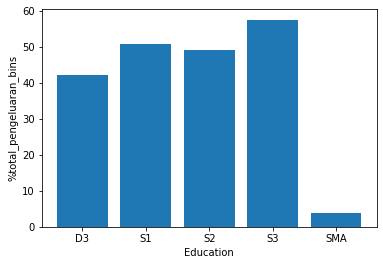

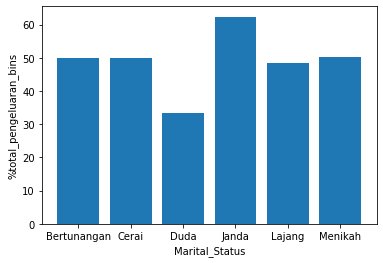

In [72]:
for j in range (0,len(categorical)):
    cat = categorical[j]
    df['total_pengeluaran_bins_new'] = df['total_pengeluaran_bins']
    df_cat = df.groupby([cat])['total_pengeluaran_bins'].count()
    df_cat = df_cat.reset_index()
    df_cat_corr = df[df['total_pengeluaran_bins']==1].groupby([cat])['total_pengeluaran_bins_new'].count()
    df_cat_corr = df_cat_corr.reset_index()
    df_cat_corr = df_cat.merge(df_cat_corr,how='left',on=cat)
    df_cat_corr['%total_pengeluaran_bins'] = (df_cat_corr['total_pengeluaran_bins_new']/df_cat_corr['total_pengeluaran_bins'])*100
    plt.bar(df_cat_corr[cat],df_cat_corr['%total_pengeluaran_bins'])
    plt.xlabel(cat)
    plt.ylabel('%total_pengeluaran_bins')
    plt.show()

## Multivariate Analysis

In [90]:
df.drop(['total_transaksi_bins','total_transaksi_bins_new','total_pengeluaran_bins','total_pengeluaran_bins_new'],axis=1,inplace=True)

<AxesSubplot:>

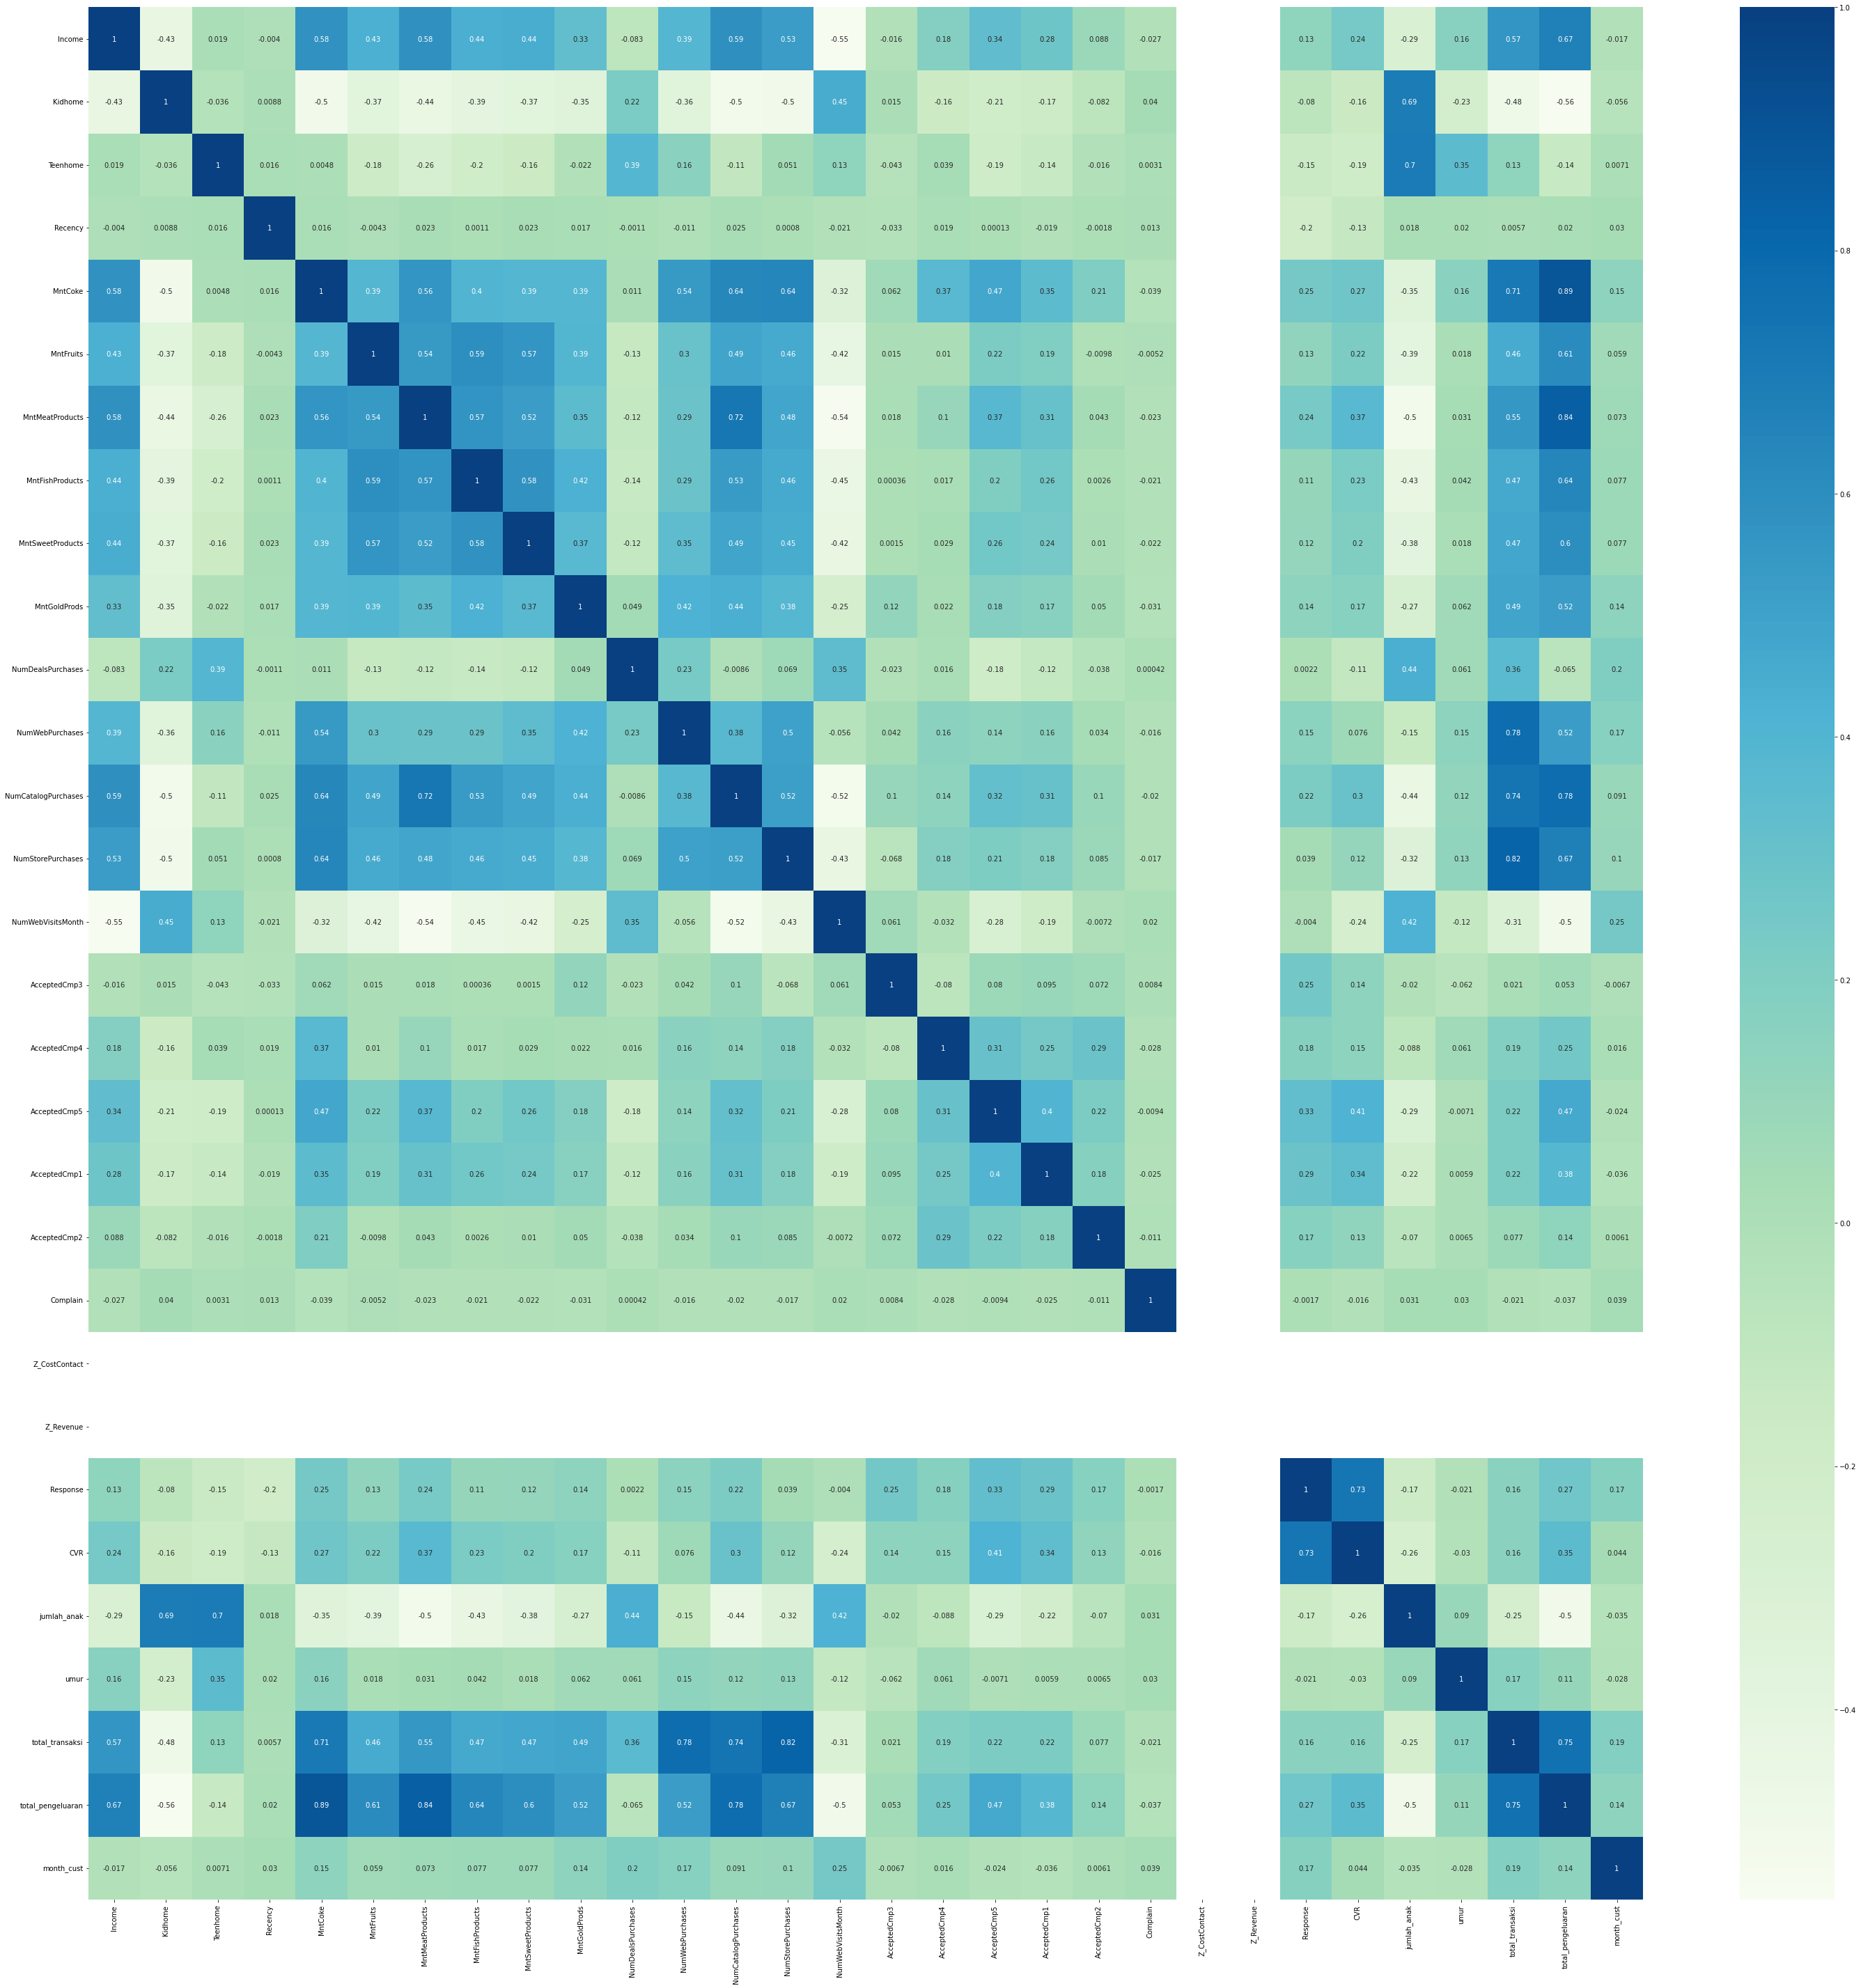

In [91]:
plt.figure(figsize = (50,50))
corr = numeric
df_corr = df[corr]
correlation = df_corr.corr()
sns.heatmap(correlation, cmap = "GnBu", annot = True)

In [92]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

C:\Users\Muhammad Hanif\AppData\Local\Temp\ipykernel_14780\2772442783.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [93]:
to_drop_hicorr

['NumCatalogPurchases', 'CVR', 'umur', 'total_transaksi', 'total_pengeluaran']